Dataframe Shape: (178, 13)
Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB
None
Dataframe Description:
       

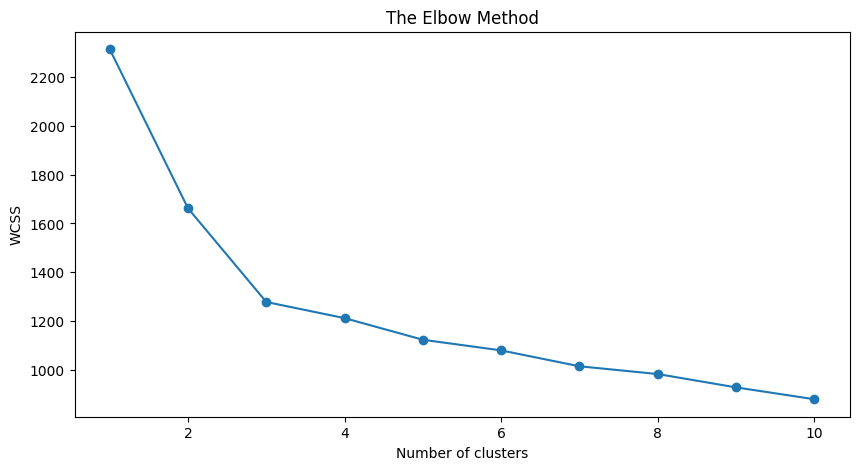

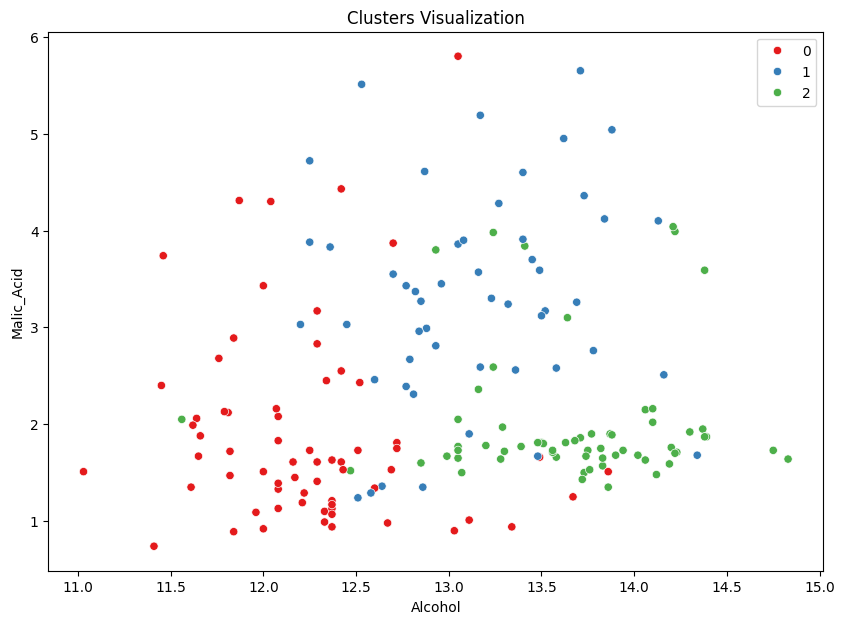

Cluster Centers:
[[-0.92607185 -0.39404154 -0.49451676  0.17060184 -0.49171185 -0.07598265
   0.02081257 -0.03353357  0.0582655  -0.90191402  0.46180361  0.27076419
  -0.75384618]
 [ 0.16490746  0.87154706  0.18689833  0.52436746 -0.07547277 -0.97933029
  -1.21524764  0.72606354 -0.77970639  0.94153874 -1.16478865 -1.29241163
  -0.40708796]
 [ 0.83523208 -0.30380968  0.36470604 -0.61019129  0.5775868   0.88523736
   0.97781956 -0.56208965  0.58028658  0.17106348  0.47398365  0.77924711
   1.12518529]]


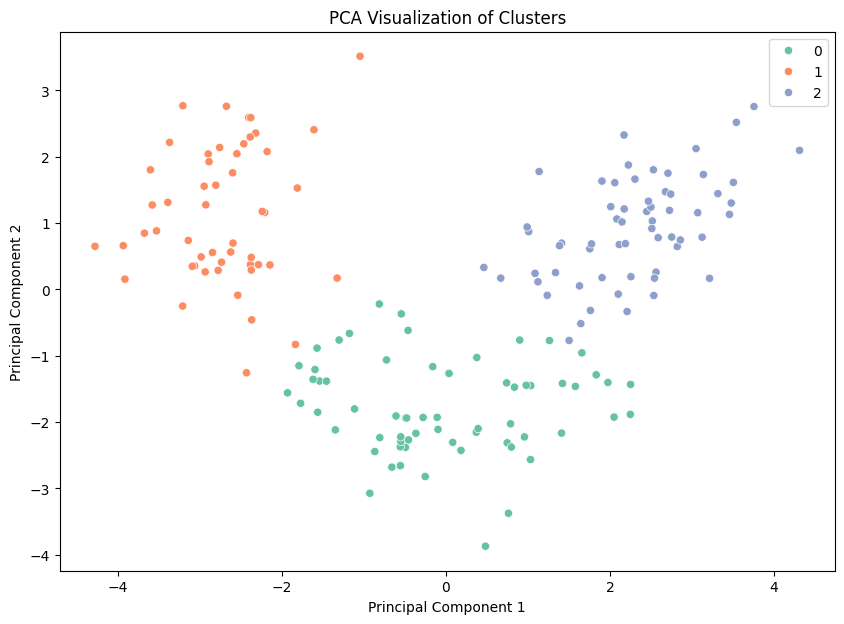

In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load Dataset
df = pd.read_csv('wine-clustering.csv')

# Exploratory Data Analysis
print("Dataframe Shape:", df.shape)
print("Dataframe Info:")
print(df.info())
print("Dataframe Description:")
print(df.describe())

# Check Missing Values
print("Missing Values:")
print(df.isnull().sum())

# Scaling Data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# From the Elbow graph, choose the optimal number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(df_scaled)

# Add cluster label to the original dataframe
df['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10,7))
sns.scatterplot(x=df.iloc[:,0], y=df.iloc[:,1], hue=df['Cluster'], palette='Set1')
plt.title('Clusters Visualization')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.legend()
plt.show()

# Centroids
print("Cluster Centers:")
print(kmeans.cluster_centers_)

# PCA for better visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df['Cluster']

plt.figure(figsize=(10,7))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='Set2', data=pca_df)
plt.title('PCA Visualization of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

Penjelasan Tahapan Proses Clustering
1. Import Library

  Mengimpor pustaka Python yang diperlukan seperti pandas, numpy, matplotlib, seaborn, sklearn.cluster.KMeans, sklearn.preprocessing.StandardScaler, dan sklearn.decomposition.PCA.
  Semua library ini diperlukan untuk membaca data, melakukan analisis, membuat model clustering, dan visualisasi.

2. Load Dataset

  Membaca dataset wine-clustering.csv ke dalam sebuah DataFrame menggunakan pandas.
  Dataset ini berisi beberapa fitur kimiawi yang menggambarkan karakteristik dari berbagai jenis wine.

3. Exploratory Data Analysis (EDA)
Melakukan analisis awal untuk memahami data:

- Menampilkan jumlah baris dan kolom.

- Melihat tipe data pada tiap kolom.

- Mencari tahu apakah ada missing values.

 Menyajikan statistik deskriptif seperti mean, standar deviasi, minimum, maksimum, dan quartiles.

4. Data Preprocessing: Scaling
Melakukan standarisasi fitur menggunakan StandardScaler agar seluruh fitur memiliki skala yang sama (rata-rata 0 dan standar deviasi 1).
Hal ini penting karena KMeans sangat sensitif terhadap perbedaan skala antar fitur.

5. Menentukan Jumlah Cluster dengan Elbow Method
Menggunakan metode Elbow untuk menentukan jumlah klaster optimal:

- Menghitung nilai WCSS (Within Cluster Sum of Squares) untuk jumlah cluster dari 1 sampai 10.

- Membuat plot WCSS terhadap jumlah cluster.

- Melihat 'siku' (elbow) pada grafik untuk menentukan jumlah cluster terbaik, yang dalam kasus ini adalah 3.

6. Membangun Model KMeans
Membuat model clustering menggunakan algoritma KMeans dengan jumlah cluster yang dipilih (3 cluster).
Model ini mengelompokkan data berdasarkan kemiripan karakteristik fiturnya.

7. Visualisasi Cluster Berdasarkan Fitur Asli
Membuat plot sebar (scatter plot) menggunakan dua fitur pertama dalam dataset untuk melihat persebaran data berdasarkan cluster yang dihasilkan.
Setiap klaster dibedakan dengan warna yang berbeda.

8. Reduksi Dimensi dengan PCA
Melakukan reduksi dimensi menggunakan Principal Component Analysis (PCA) untuk memproyeksikan data dari banyak fitur menjadi hanya dua komponen utama (PC1 dan PC2).
Tujuan utama adalah membuat visualisasi cluster lebih jelas dan mudah dipahami.

9. Visualisasi Cluster Setelah PCA
Membuat scatter plot berdasarkan dua komponen utama hasil PCA.
Setiap klaster ditampilkan dengan warna berbeda untuk memperlihatkan seberapa baik pemisahan antar cluster setelah reduksi dimensi.

